# Part 5: One-Dimensional Kalman Filter With Process Noise

In the real world there are uncertainties in the system dynamic model, which is called **Process Noise**.<br>
The Process Noise variance will be denotet as $q$.

We update the Covariance Extrapolation Equation as follows:<br>
$p_{n+1,n}= p_{n,n}+ q_{n}$

The updated Kalman Filter equations in one dimensoon are give as:<br>

State Update:<br>
$\hat{x}_{n,n}=~ \hat{x}_{n,n-1}+ K_{n} \left( z_{n}- \hat{x}_{n,n-1} \right)$

State Extrapolation:<br>
$\hat{x}_{n+1,n}= \hat{x}_{n,n}+  \Delta t\hat{\dot{x}}_{n,n}$<br>
$\hat{\dot{x}}_{n+1,n}= \hat{\dot{x}}_{n,n}$

Kalman Gain:<br>
$K_{n}= \frac{p_{n,n-1}}{p_{n,n-1}+r_{n}}$

Covariance Update:<br>
$p_{n,n}=~  \left( 1-K_{n} \right) p_{n,n-1}$

Covariance Extrapolation:<br>
$p_{n+1,n}= p_{n,n} + q_{n}$

In the following example we will estimate the temperature of a liquid tank.
We assume that at steady state the liquid temperature is constant. However, some fluctuations in the true liquid temperature are possible. We can describe the system dynamics by the following equation:<br>
$x_n = T + w_n$

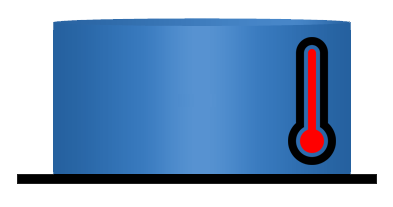!

We assume the liquid has a true temperature around 50 °C +- 0.5 °C.
Our process noise variance will be 0.001, thus we believe our model is accurate.

Measurement Error: 0.1 (stddev)<br>
(Bad) Initial Guess: 10 °C<br>
Initial Estimate Uncertainty: 100 (variance)

In [33]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
class Filter:
    
    def __init__(self,init_guess, init_uncertainty,measurement_uncertainty,process_noise,true_temp,temp_stdev):

        self.temp_stdev = temp_stdev
        self.true = self.true_temperature()
        self.init_guess = init_guess
        self.estimation = init_guess
        self.prediction = None
        self.measurement = None
        
        self.measurements = []
        self.estimations = []
        self.true_temps = []
        self.Ks = []
        self.ps = []
        self.qs = []
        
        self.K = None # Kalman gain
        self.r = measurement_uncertainty # Measurement uncertainty (variance)
        self.p = init_uncertainty # Estimation Uncertainty (variance)
        self.q = process_noise # Process Noise (variance)
        
    def run(self,iterations):
        self.iterations = iterations
        for _ in range(iterations):
            
            self.prediction = self.estimation
            self.p = self.p + self.q
            
            temp = self.true_temperature()
            self.true_temps.append(temp)
            
            self.measurement = self.noisy_measurement(temp)
            self.measurements.append(self.measurement)
            
            self.K = self.p/(self.p+self.r)
            self.Ks.append(self.K)
            
            self.estimation = self.prediction + self.K*(self.measurement-self.prediction)
            self.estimations.append(self.estimation)
            
            self.p = (1-self.K)*self.p
            self.ps.append(self.p)           
        
    
    def true_temperature(self):
        # True Temperature of the liquid
         return np.random.normal(50,self.temp_stdev,1)[0]
    
    
    def noisy_measurement(self,x):
        # Measurement Error
        return np.random.normal(x,self.r,1)[0]
    
    def plot_result(self):
        figure, axis = plt.subplots(3,1,figsize=(15,15))
        axis[0].plot(range(self.iterations),self.true_temps,"r",self.measurements,"b",self.estimations,"g*-")
        axis[0].legend(["True Temperature,","Measurement","Estimation"])
        axis[0].set_title("Temperatures")
        
        axis[1].plot(range(self.iterations),self.ps,[self.r for i in range(self.iterations)])
        axis[1].legend(["Estimation Uncertainty","Measurement Uncertainty"])
        axis[1].set_title("Uncertainty")

        axis[2].plot(range(self.iterations), self.Ks)
        axis[2].legend(["Kalman Gain"])
        axis[2].set_title("Kalman Gain")
        
        
        
    def print_result(self):
        print(f"Initial guess: {self.init_guess}")
        print(f"Estimation at iteration {self.iterations}: {self.estimation}")
        print(f"Kalman Gain at iteration {self.iterations}: {self.K}")
        print(f"Estimation uncertainty at iteration {self.iterations}: {self.p}")
        

In [98]:
f = Filter(init_guess=10, init_uncertainty=100**2,measurement_uncertainty=0.1,process_noise=0.001,true_temp=50,temp_stdev=0.01)

In [99]:
f.run(25)

In [100]:
f.print_result()

Initial guess: 10
Estimation at iteration 25: 50.01585879584134
Kalman Gain at iteration 25: 0.09648619411930177
Estimation uncertainty at iteration 25: 0.009648619411930178


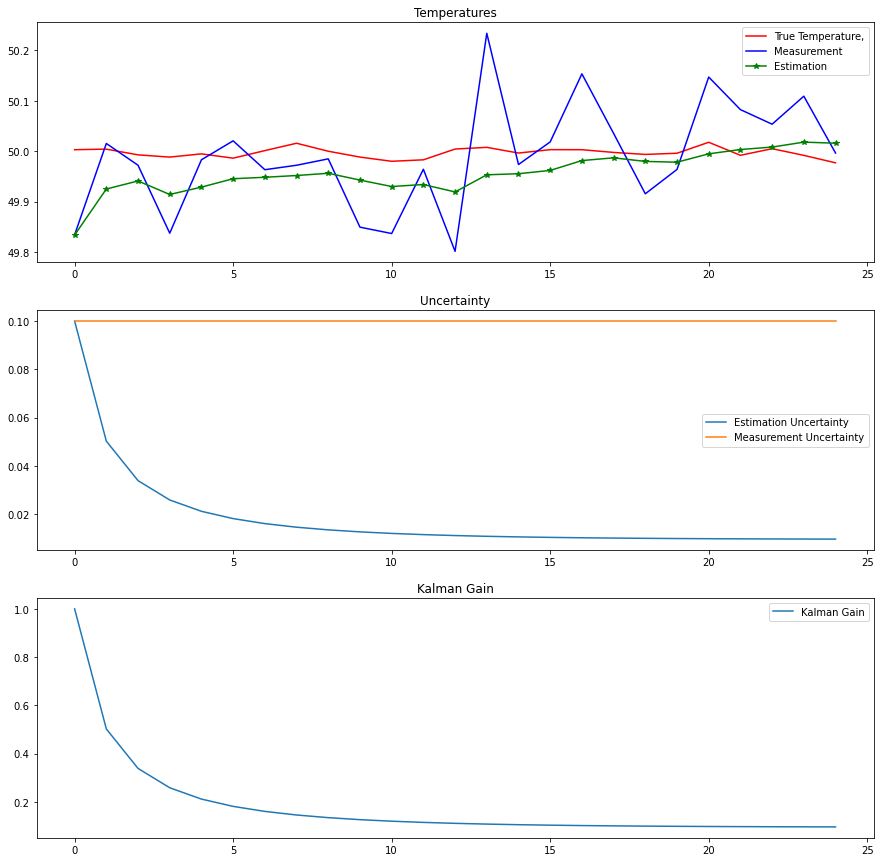

In [101]:
f.plot_result()